In [3]:
# Data Loading & Exploration
# Import required libraries
import pandas as pd

# Task 1 Load the COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')

# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Task 2 Show the first 5 rows
df.head()

Dataset shape: (84686, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [2]:
# Inspect columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84686 entries, 0 to 84685
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    84686 non-null  object 
 1   continent                                   80778 non-null  object 
 2   location                                    84686 non-null  object 
 3   date                                        84686 non-null  object 
 4   total_cases                                 83085 non-null  float64
 5   new_cases                                   82986 non-null  float64
 6   new_cases_smoothed                          82523 non-null  float64
 7   total_deaths                                76391 non-null  float64
 8   new_deaths                                  76356 non-null  float64
 9   new_deaths_smoothed                         75892 non-null  float64
 10  total_case

In [4]:
# Task 3 Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

continent                                   3908
total_cases                                 1601
new_cases                                   1700
new_cases_smoothed                          2163
total_deaths                                8295
                                           ...  
human_development_index                    16891
excess_mortality_cumulative_absolute       81827
excess_mortality_cumulative                81827
excess_mortality                           81827
excess_mortality_cumulative_per_million    81827
Length: 64, dtype: int64

In [16]:
# Task 4 Handle missing numeric values with fillna() or interpolate().
# Import required libraries
import pandas as pd

# Load the COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')
print("Dataset shape:", df.shape)

# Select countries of interest
countries = ['Brazil', 'Germany', 'China']
df_countries = df[df['location'].isin(countries)].copy()

# Drop rows with missing dates or critical values (total_cases, total_deaths)
df_countries = df_countries.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Convert 'date' column to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Fill missing numeric values using interpolate()
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']

# Use interpolation to estimate missing values
for col in numeric_cols:
    if col in df_countries.columns:
        df_countries[col] = df_countries[col].interpolate()

# Checks remaining missing values
print(df_countries.isnull().sum())

Dataset shape: (84686, 67)
iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       2687
excess_mortality_cumulative                2687
excess_mortality                           2687
excess_mortality_cumulative_per_million    2687
Length: 67, dtype: int64


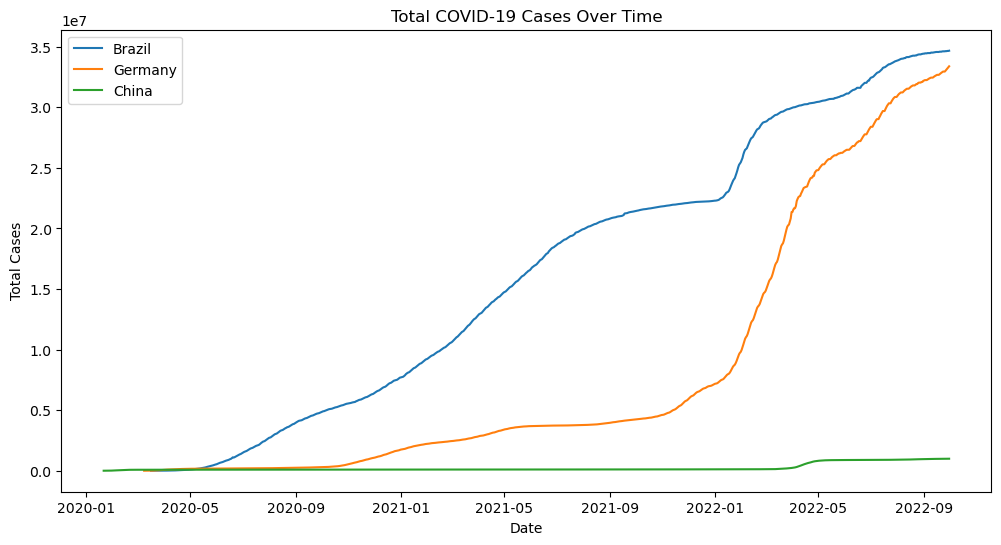

In [17]:
# Exploratory Data Analysis (EDA)
# Task 1 Plot total cases over time for selected countries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time for selected countries
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

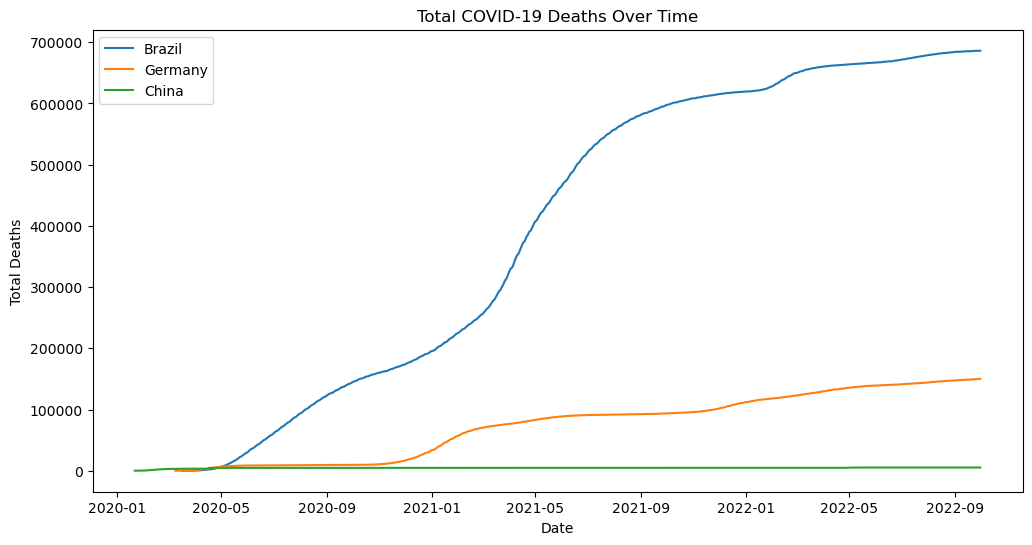

In [18]:
# Exploratory Data Analysis (EDA)
# Task 2 Plot total deaths over time for selected countries
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

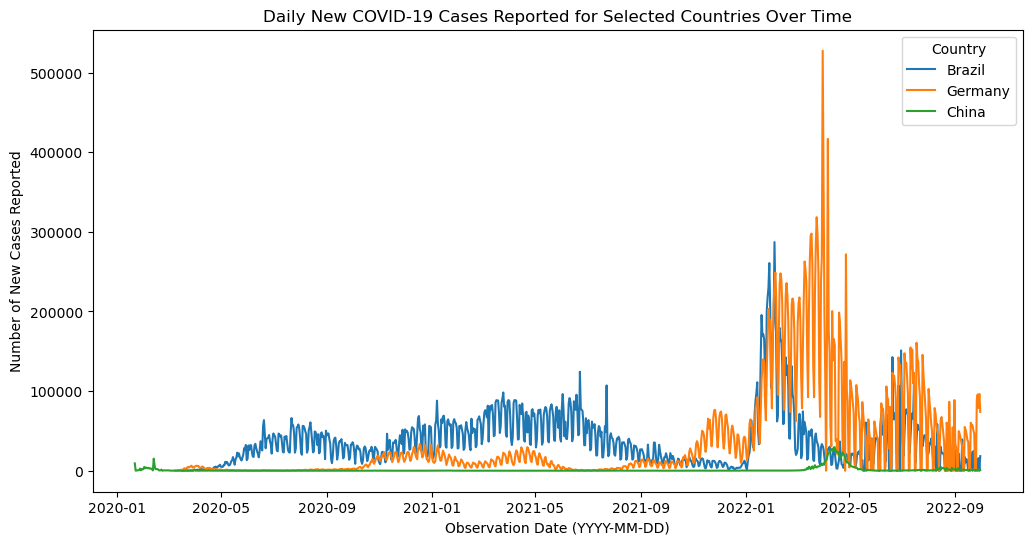

In [24]:
# Exploratory Data Analysis (EDA)
# Task 3 Compare daily new cases between countries
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases Reported for Selected Countries Over Time')
plt.xlabel('Observation Date (YYYY-MM-DD)')
plt.ylabel('Number of New Cases Reported')
plt.legend(title="Country")
plt.show()

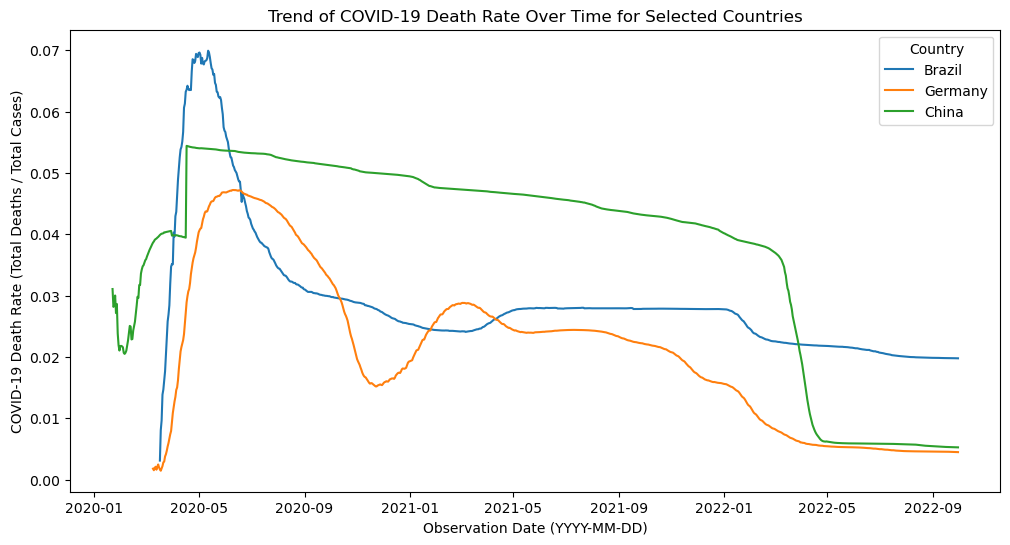

In [25]:
# Exploratory Data Analysis (EDA)
# Task 4 Calculate and plot death rate (total_deaths / total_cases)
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    death_rate = subset['total_deaths'] / subset['total_cases']
    plt.plot(subset['date'], death_rate, label=country)
plt.title('Trend of COVID-19 Death Rate Over Time for Selected Countries')
plt.xlabel('Observation Date (YYYY-MM-DD)')
plt.ylabel('COVID-19 Death Rate (Total Deaths / Total Cases)')
plt.legend(title='Country')
plt.show()

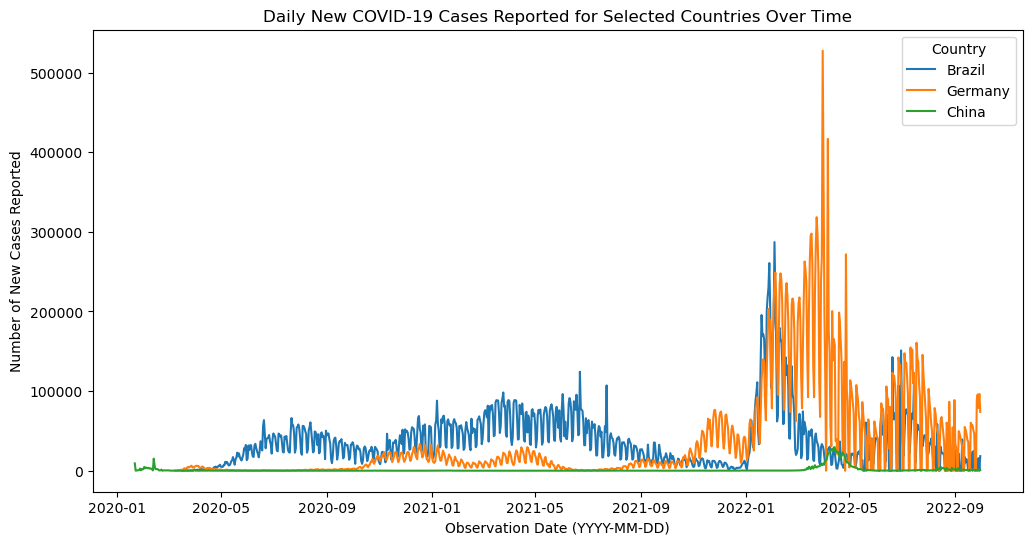

In [27]:
# Exploratory Data Analysis (EDA)
# 5. Bar Chart: Top Countries by Total Cases (Latest Data)
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases Reported for Selected Countries Over Time')
plt.xlabel('Observation Date (YYYY-MM-DD)')
plt.ylabel('Number of New Cases Reported')
plt.legend(title="Country")
plt.show()

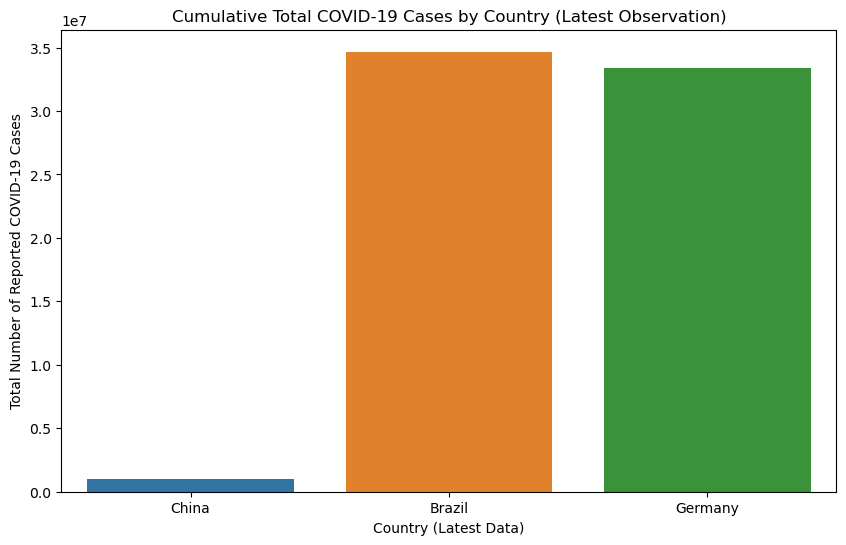

In [30]:
# Exploratory Data Analysis (EDA)
# 6. Bar Chart: Top Countries by Total Cases (Latest Data)
df_latest = df_countries.sort_values('date').groupby('location').tail(1)
plt.figure(figsize=(10,6))
sns.barplot(x='location', y='total_cases', data=df_latest)
plt.title('Cumulative Total COVID-19 Cases by Country (Latest Observation)')
plt.xlabel('Country (Latest Data)')
plt.ylabel('Total Number of Reported COVID-19 Cases')
plt.show()

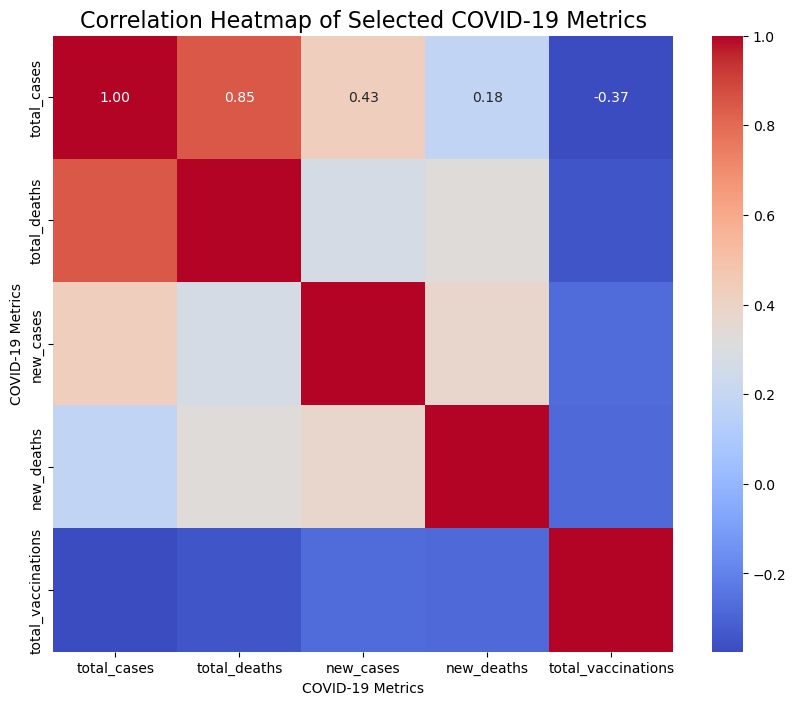

In [31]:
# Exploratory Data Analysis (EDA)
# 6. Heatmap: Correlation Analysis of Selected COVID-19 Metrics
cols_for_corr = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
corr_matrix = df_countries[cols_for_corr].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected COVID-19 Metrics', fontsize=16)
plt.xlabel('COVID-19 Metrics')
plt.ylabel('COVID-19 Metrics')
plt.show()

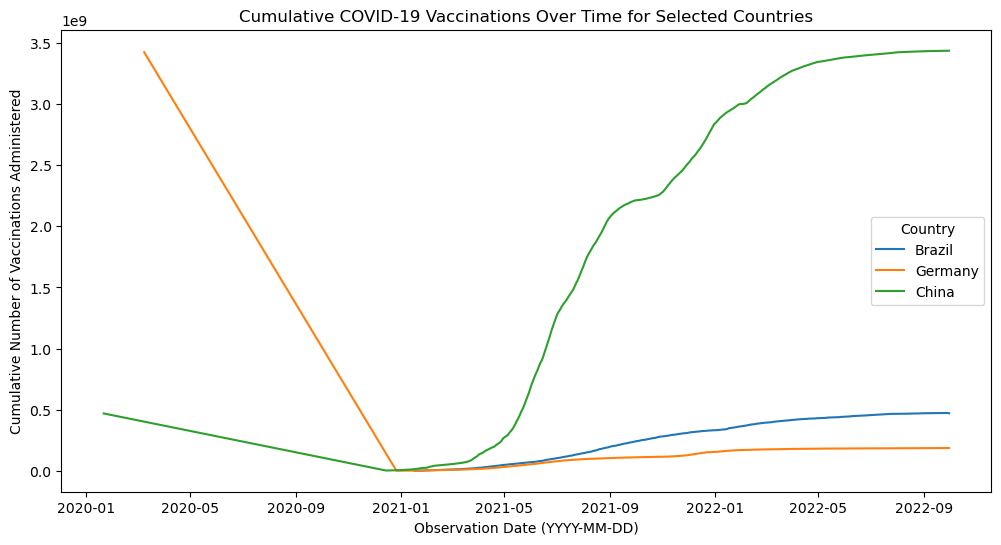

In [36]:
# Visualizing Vaccination Progress
# cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time for Selected Countries')
plt.xlabel('Observation Date (YYYY-MM-DD)')
plt.ylabel('Cumulative Number of Vaccinations Administered')
plt.legend(title='Country')
plt.show()

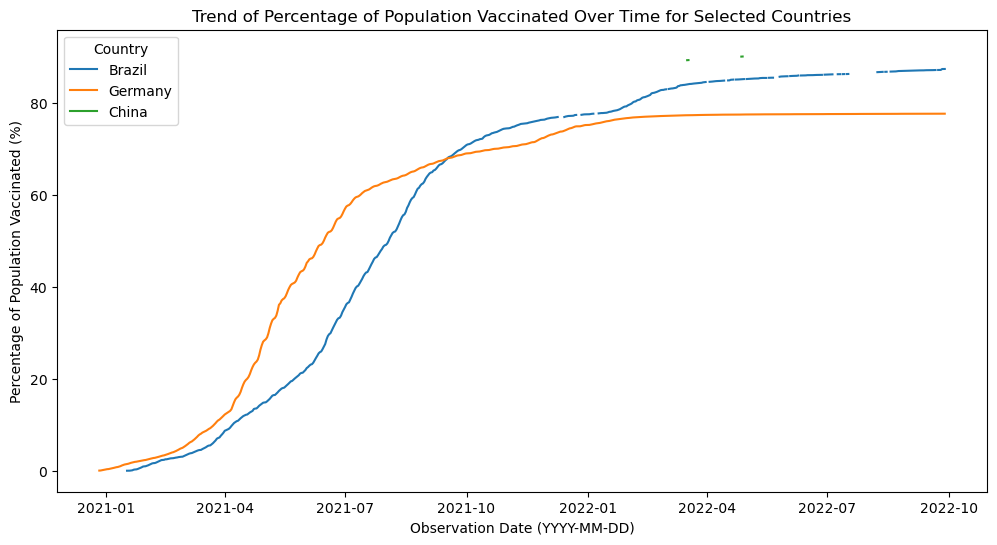

In [37]:
# Compare % vaccinated population (using people_vaccinated_per_hundred if available)
if 'people_vaccinated_per_hundred' in df_countries.columns:
    plt.figure(figsize=(12,6))
    for country in countries:
        subset = df_countries[df_countries['location'] == country]
        plt.plot(subset['date'], subset['people_vaccinated_per_hundred'], label=country)
    plt.title('Trend of Percentage of Population Vaccinated Over Time for Selected Countries')
    plt.xlabel('Observation Date (YYYY-MM-DD)')
    plt.ylabel('Percentage of Population Vaccinated (%)')
    plt.legend(title='Country')
    plt.show()

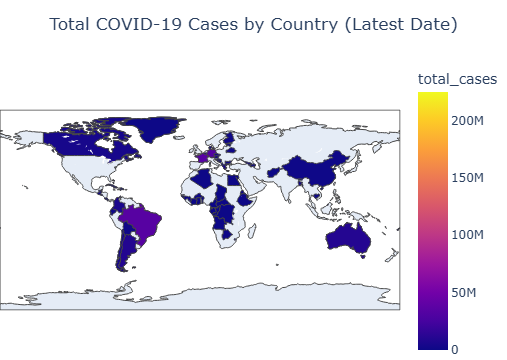

In [43]:
import plotly.express as px

# Prepare dataframe for the latest date
latest_global = df[df['date'] == df['date'].max()]

# Create a choropleth map using total cases and iso_code
fig = px.choropleth(latest_global,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases by Country (Latest Date)")

# Update layout with detailed axis titles and margins
fig.update_layout(
    xaxis_title="Longitude (Degrees)",
    yaxis_title="Latitude (Degrees)",
    margin=dict(l=0, r=0, t=60, b=0),
    title_x=0.5
)
fig.show()

# Insights & Reporting

## Key Insights
1. **Vaccination Progress**: Among the selected countries (Brazil, Germany, China), Germany shows the fastest vaccination rollout, with a higher percentage of the population vaccinated over time.
2. **Case Trends**: Brazil experienced the highest number of daily new cases during the peak of the pandemic, while China maintained relatively low daily case counts.
3. **Death Rate Analysis**: The death rate (total deaths/total cases) has been declining over time for all countries, indicating improved treatment or containment measures.
4. **Correlation Patterns**: A strong positive correlation exists between total cases and total deaths, as shown in the heatmap, while vaccination metrics show a weaker correlation with new cases.
5. **Global Overview**: The choropleth map highlights countries with the highest total cases, with the United States and India leading globally.

## Anomalies and Patterns
- **China's Data**: Despite being one of the first countries affected, China's total cases and deaths remain significantly lower than other countries, which could indicate effective containment or reporting differences.
- **Vaccination Disparities**: The percentage of the population vaccinated varies widely, with some countries achieving near-complete coverage while others lag behind.
- **Death Rate Fluctuations**: Some countries show temporary spikes in death rates, possibly due to overwhelmed healthcare systems during case surges.

## Visualizations
The following visualizations support these insights:
- Line plots for total cases, total deaths, and vaccination progress over time.
- A bar chart comparing cumulative cases across countries.
- A heatmap showing correlations between key COVID-19 metrics.
- A choropleth map for global case distribution.